# 0. Import Dependencies

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 1. Import Data

In [13]:
df_movie_titles = pd.read_csv('./data/Movie_Id_Titles')
df_movie_ratings = pd.read_csv('./data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [14]:
df_movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
df_movie_ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


# 2. Data Visualization

In [16]:
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [18]:
df_movie_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100003.0,4.624709e+02,2.666225e+02,0.0,254.0,447.0,682.0,943.0
item_id,100003.0,4.255209e+02,3.307978e+02,1.0,175.0,322.0,631.0,1682.0
rating,100003.0,3.529864e+00,1.125704e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100003.0,8.835288e+08,5.343791e+06,874724710.0,879448715.0,882826944.0,888259984.0,893286638.0


In [19]:
df_movie_ratings = df_movie_ratings.merge(df_movie_titles, on = 'item_id').drop('timestamp', axis=1)

In [20]:
df_movie_ratings.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [31]:
df_movie_ratings_mean = df_movie_ratings.groupby('title').mean()['rating']

In [35]:
df_movie_ratings_count = df_movie_ratings.groupby('title').count()['rating']

In [41]:
df_movie_mean_count = pd.concat([df_movie_ratings_count, df_movie_ratings_mean], axis=1)
df_movie_mean_count.columns = ['count', 'mean']
df_movie_mean_count = df_movie_mean_count.reset_index()
df_movie_mean_count

,title,count,mean
0,'Til There Was You (1997),9,2.333333
1,1-900 (1994),5,2.600000
2,101 Dalmatians (1996),109,2.908257
3,12 Angry Men (1957),125,4.344000
4,187 (1997),41,3.024390
...,...,...,...
1659,Young Guns II (1990),44,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41,3.341463
1661,Zeus and Roxanne (1997),6,2.166667
1662,unknown,9,3.444444


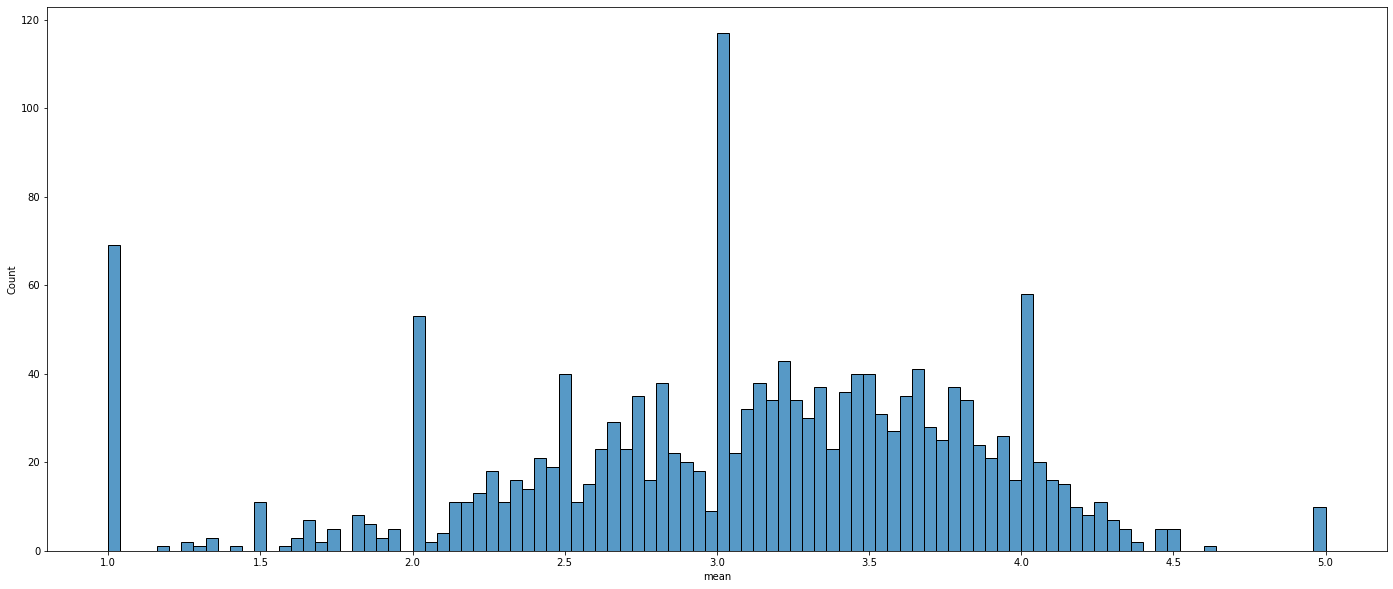

In [51]:
plt.figure(figsize=(24,10))
sns.histplot(x='mean', data=df_movie_mean_count, bins=100)
plt.show()

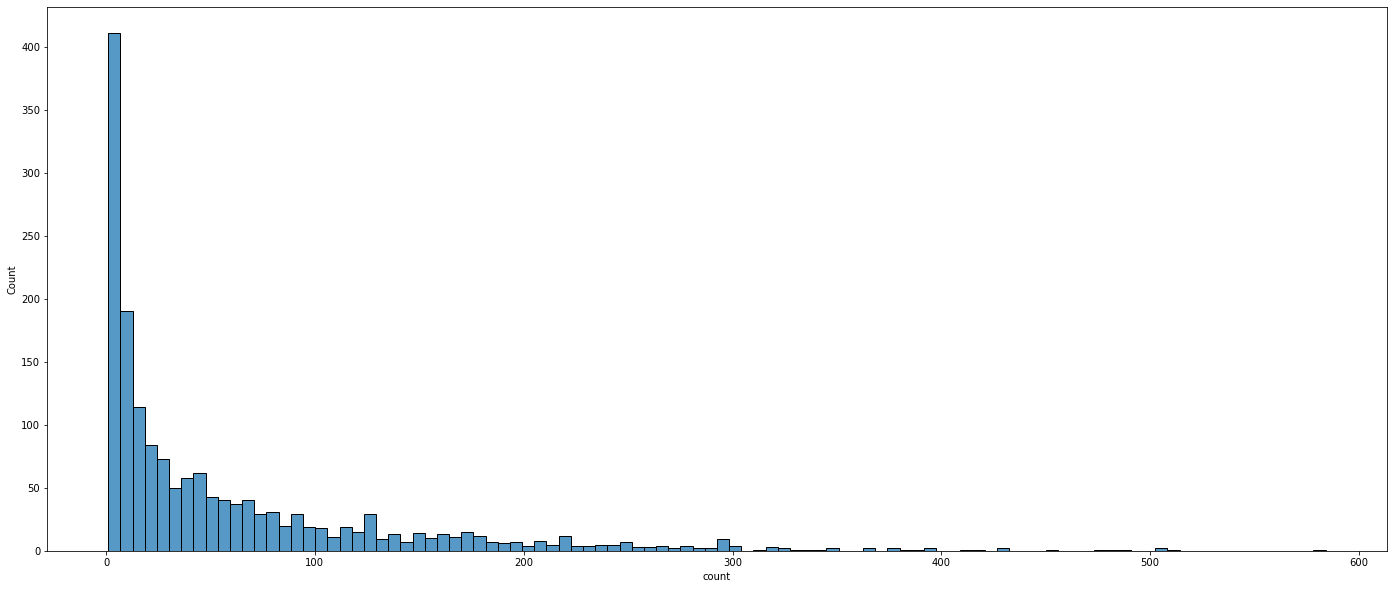

In [52]:
plt.figure(figsize=(24,10))
sns.histplot(x='count', data=df_movie_mean_count, bins=100)
plt.show()

In [58]:
df_movie_mean_count[df_movie_mean_count.sort_values('count', ascending=False)['mean'] > 4].sort_values(['count', 'mean'], ascending=False).head()

,title,count,mean
1398,Star Wars (1977),584,4.359589
498,Fargo (1996),508,4.155512
1234,Return of the Jedi (1983),507,4.007890
1205,Raiders of the Lost Ark (1981),420,4.252381
612,"Godfather, The (1972)",413,4.283293


# 3. One Movie Model

In [61]:
user_title_matrix = df_movie_ratings.pivot_table(index='user_id', columns='title', values='rating')

In [62]:
user_title_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
titanic_matrix = user_title_matrix["Titanic (1997)"]
titanic_matrix.head()

user_id
0    NaN
1    NaN
2    5.0
3    NaN
4    NaN
Name: Titanic (1997), dtype: float64

In [66]:
titanic_correlations = pd.DataFrame(user_title_matrix.corrwith(titanic_matrix), columns=['Correlation'])# compare titanic for each movie
titanic_correlations

,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [78]:
titanic_correlations = titanic_correlations.join(df_movie_mean_count.set_index('title')['count'])

In [85]:
titanic_sort_correlations = titanic_correlations.sort_values(['Correlation'], ascending=False)

In [90]:
titanic_sort_correlations[titanic_sort_correlations['count'] > 50].sort_values(['Correlation', 'count'], ascending=False).head()

,Correlation,count
title,,
Titanic (1997),1.000000,350
"Adventures of Robin Hood, The (1938)",0.597532,67
Mallrats (1995),0.580393,54
Robin Hood: Men in Tights (1993),0.533114,56
Manon of the Spring (Manon des sources) (1986),0.523459,58


In [93]:
movie_corr = user_title_matrix.corr(method='pearson', min_periods=80)

In [94]:
movie_corr.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
movie_corr['Star Wars (1977)'].sort_values(ascending=False).dropna().head()

title
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Name: Star Wars (1977), dtype: float64

In [101]:
df_my_rating = pd.read_csv("./data/My_Ratings.csv")
df_my_rating

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [104]:
movie_corr[df_my_rating['Movie Name'][0]].sort_values(ascending=False).dropna().head()

title
Liar Liar (1997)                             1.000000
Con Air (1997)                               0.469828
Pretty Woman (1990)                          0.469790
Michael (1996)                               0.442022
Indiana Jones and the Last Crusade (1989)    0.414427
Name: Liar Liar (1997), dtype: float64

In [ ]:
movie_corr[df_my_rating['Movie Name'][0]].sort_values(ascending=False)